In [1]:
# Exploratory Data Analysis and Model Building

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the cleaned dataset
data = pd.read_csv('cleaned_communities_crime_data.csv')

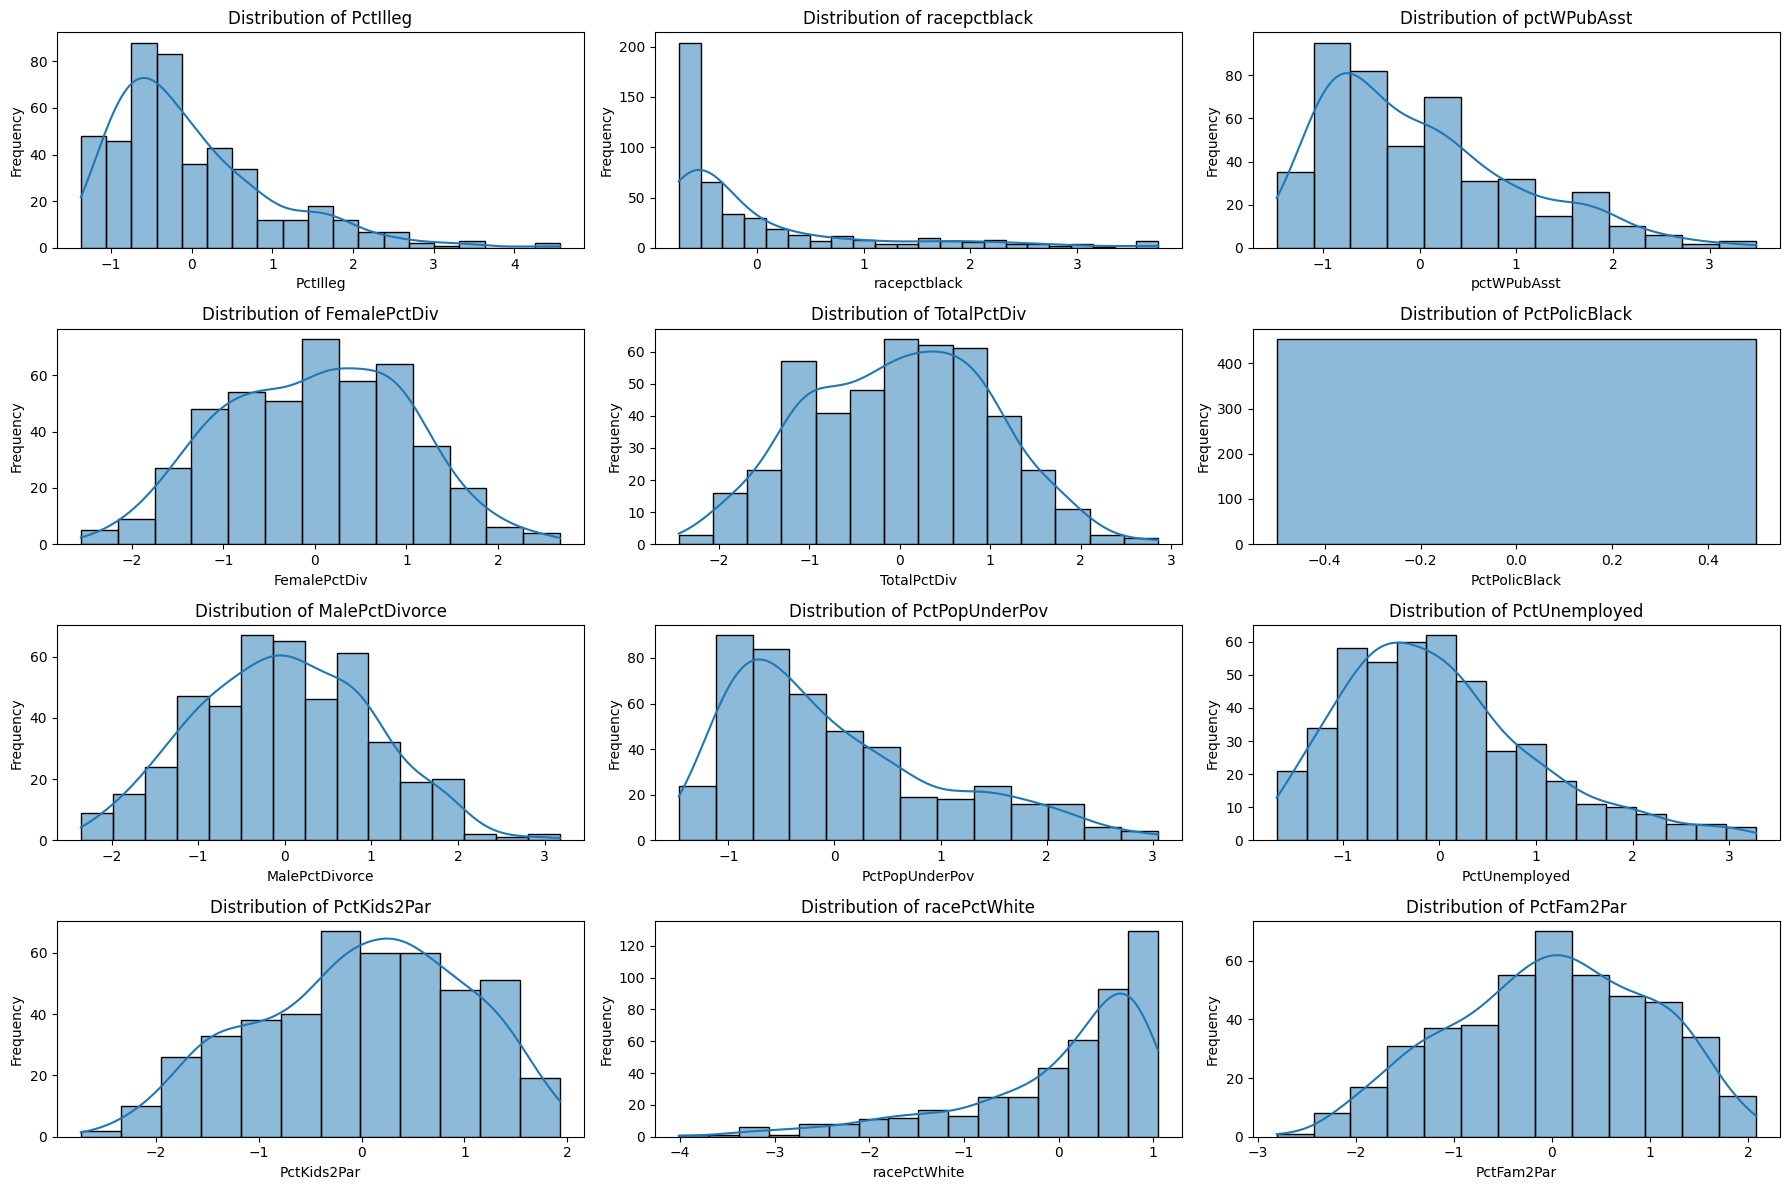

In [2]:
# Exploratory Data Analysis (EDA)

# 1. Visualizations

# Select a subset of the most relevant features based on correlation with the target
relevant_features = ['PctIlleg', 'racepctblack', 'pctWPubAsst', 'FemalePctDiv', 
                     'TotalPctDiv', 'PctPolicBlack', 'MalePctDivorce', 'PctPopUnderPov', 
                     'PctUnemployed', 'PctKids2Par', 'racePctWhite', 'PctFam2Par']

# Distribution plots for relevant features
plt.figure(figsize=(18, 12))
for i, column in enumerate(relevant_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Distribution Plots for Relevant Features
The distribution plots show the frequency of values for each relevant feature. Key observations include:

PctIlleg, pctWPubAsst, PctPolicBlack, PctPopUnderPov, and PctUnemployed: These features exhibit skewed distributions, indicating a concentration of values towards one end of the scale.
racepctblack and racePctWhite: These features are also skewed, reflecting demographic distributions in the dataset.
FemalePctDiv, TotalPctDiv, MalePctDivorce, PctKids2Par, and PctFam2Par: These features show more symmetrical distributions, indicating a more even spread of values.
Takeaway: The skewed distributions, particularly for racial and socio-economic features, suggest the need to consider transformations or handling techniques to ensure model robustness and fairness.

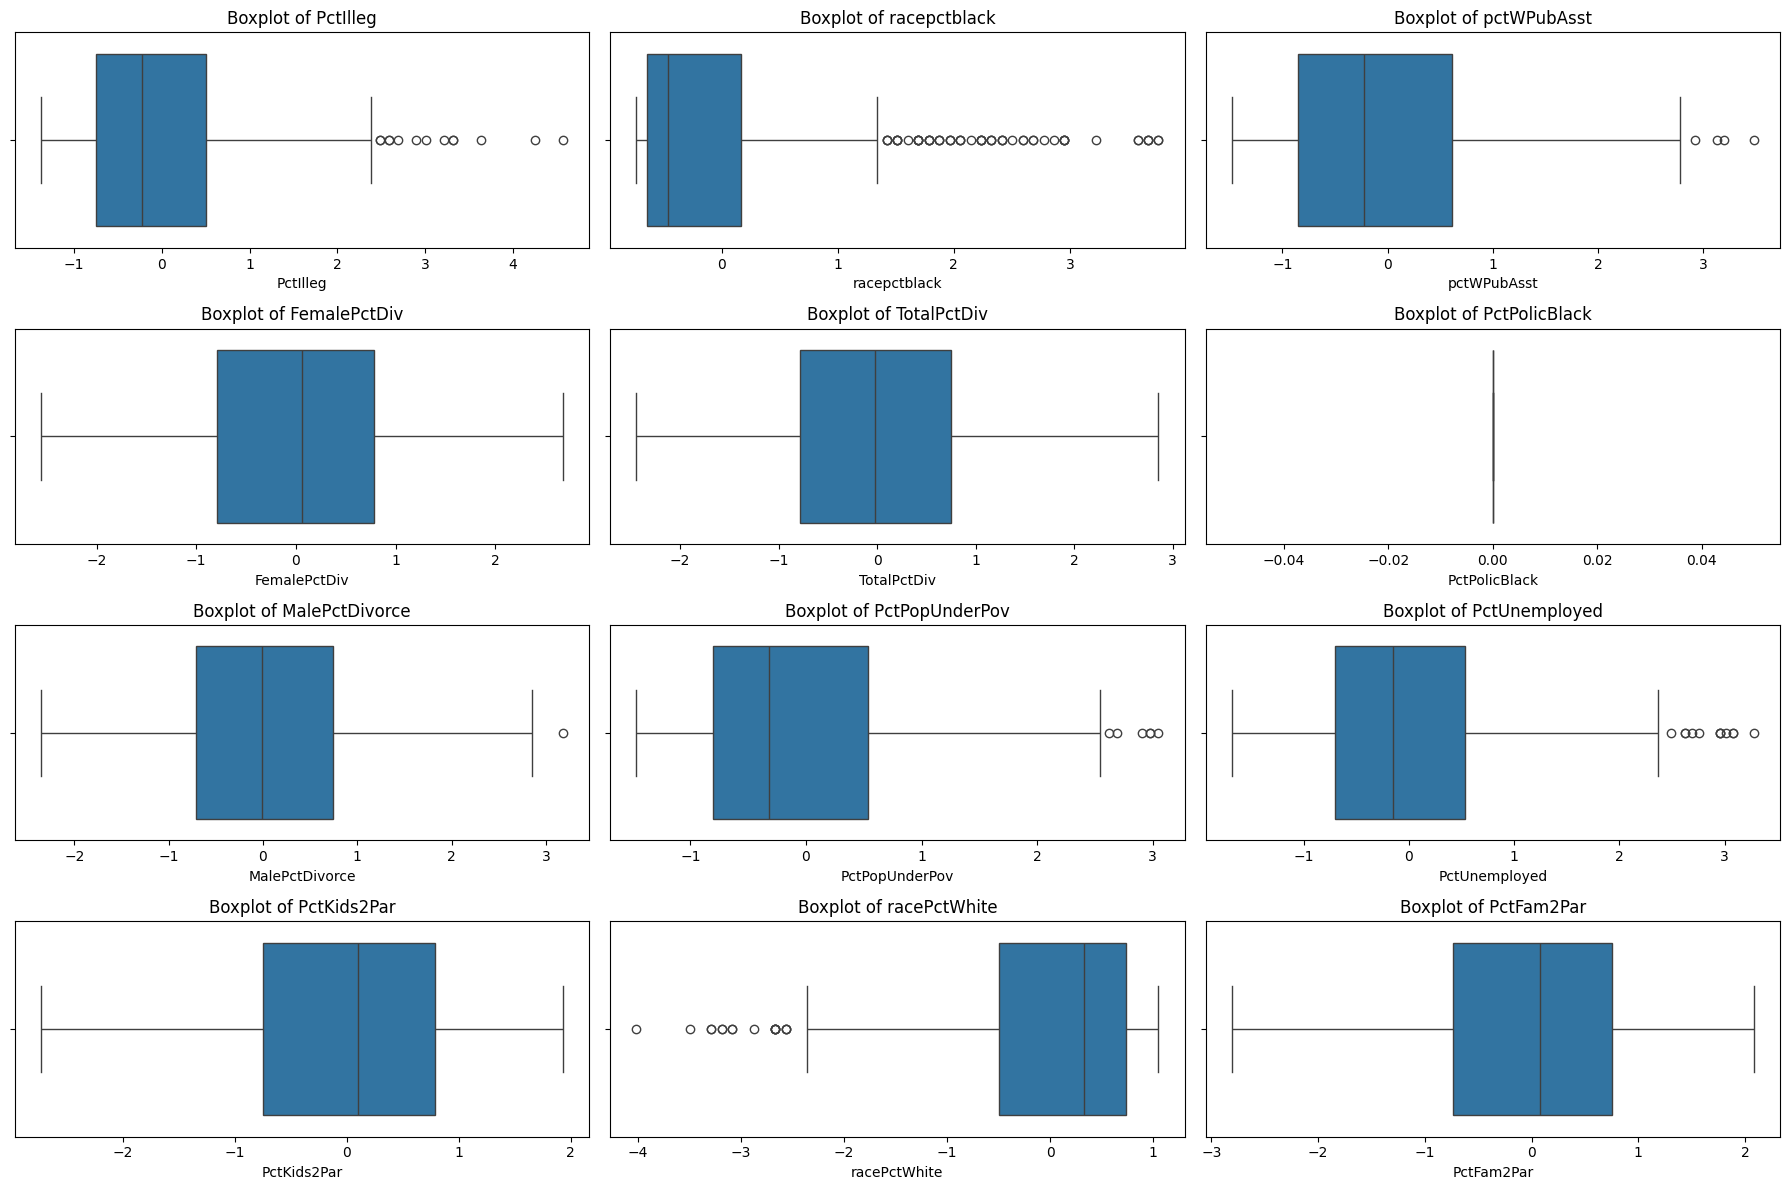

In [3]:
# Boxplots for relevant features
plt.figure(figsize=(18, 12))
for i, column in enumerate(relevant_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

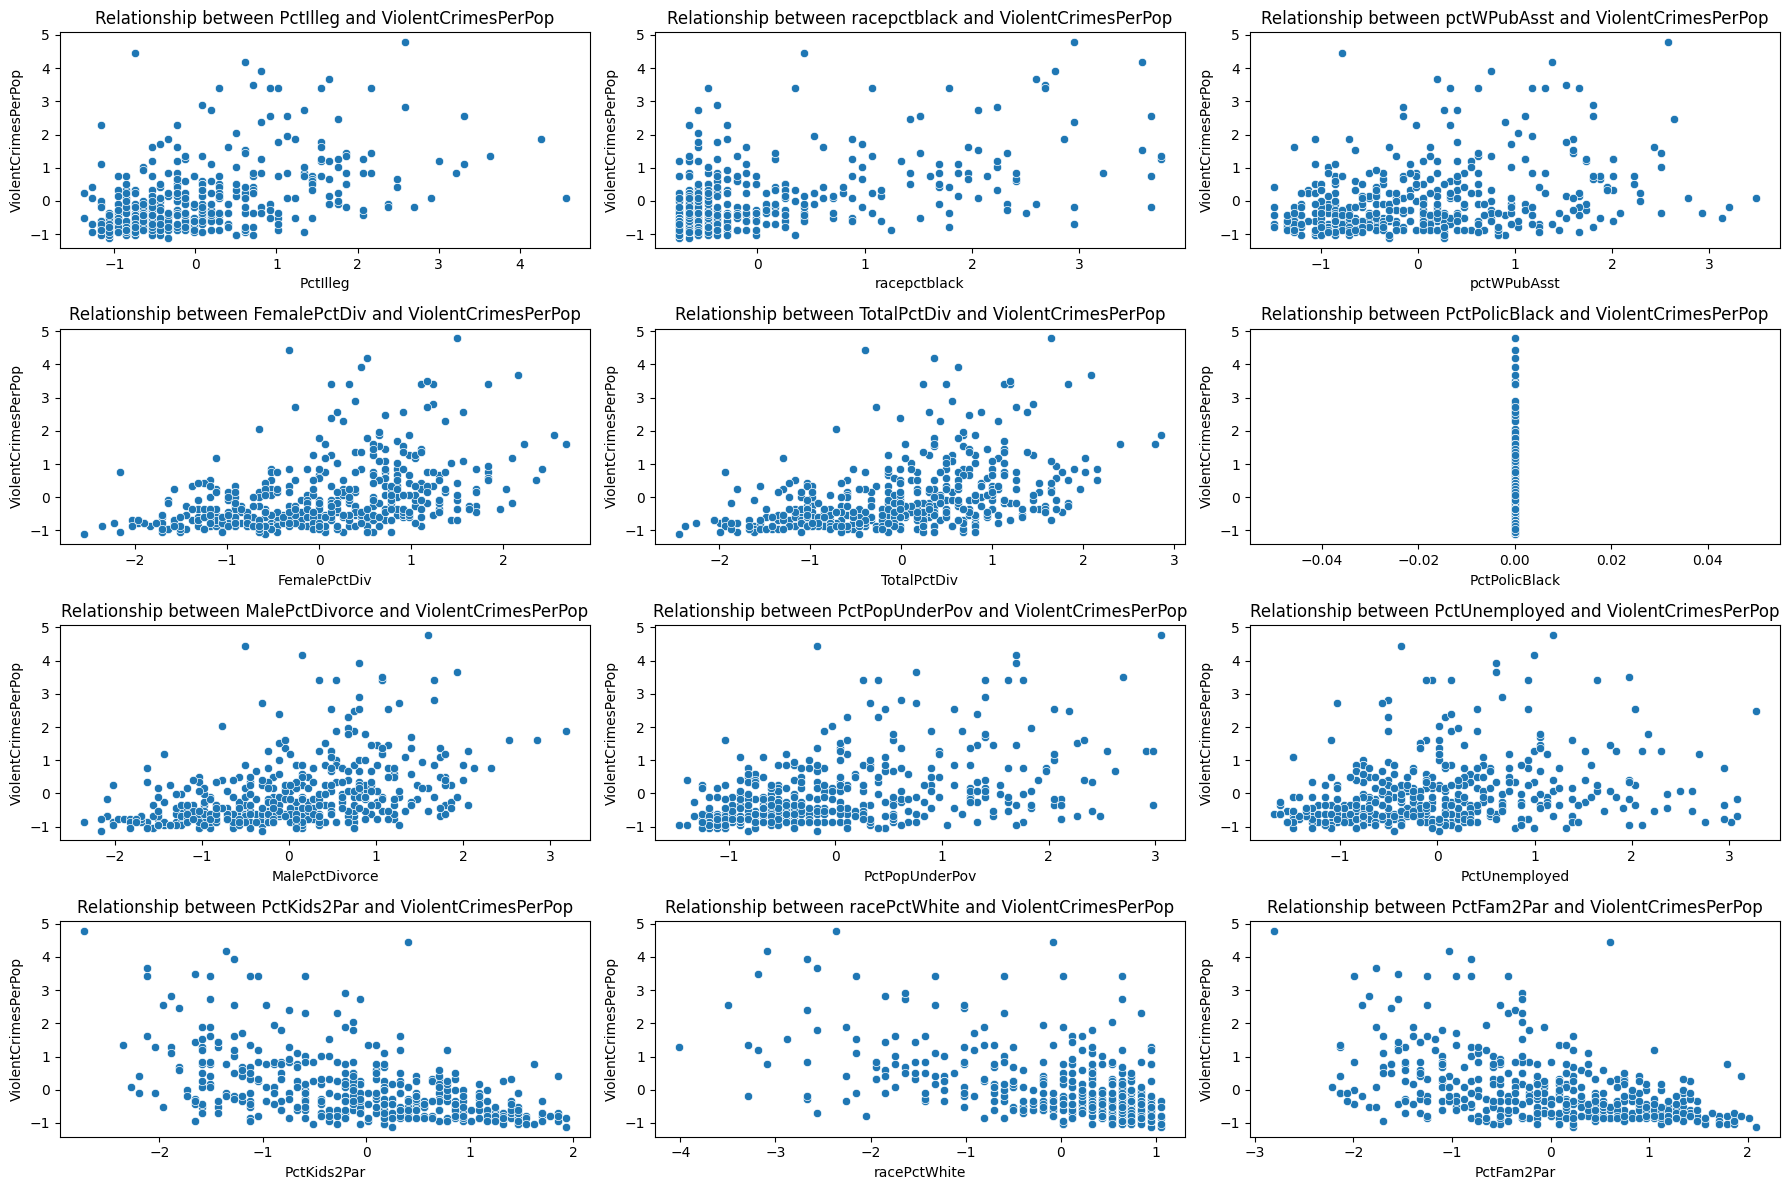

In [4]:
# Scatter plots for relationships between relevant features and target variable
target = 'ViolentCrimesPerPop'
plt.figure(figsize=(18, 12))
for i, column in enumerate(relevant_features, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=data[column], y=data[target])
    plt.title(f'Relationship between {column} and {target}')
    plt.xlabel(column)
    plt.ylabel(target)
plt.tight_layout()
plt.show()

Scatter Plots of Relevant Features vs. Target Variable
The scatter plots reveal the relationships between the relevant features and the target variable, ViolentCrimesPerPop:

Positive Correlations: Features like PctIlleg, racepctblack, pctWPubAsst, TotalPctDiv, PctPopUnderPov, and PctUnemployed show positive correlations with ViolentCrimesPerPop.
Negative Correlations: Features like PctKids2Par, racePctWhite, and PctFam2Par show negative correlations with ViolentCrimesPerPop.
Non-linear Relationships: Some features exhibit non-linear relationships, suggesting the need for non-linear modeling techniques.
Takeaway: The identified correlations can guide feature selection and engineering, emphasizing the importance of including socio-economic and demographic factors in the model.

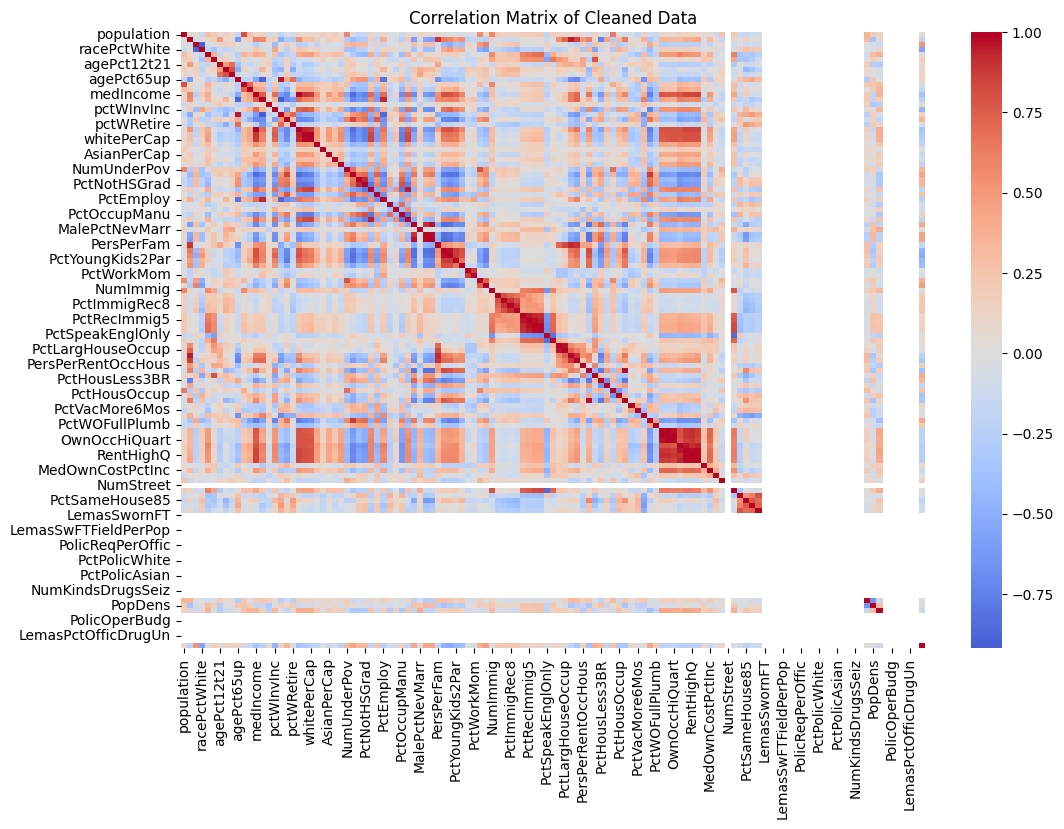

In [5]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Cleaned Data')
plt.show()

Correlation Matrix of Cleaned Data
The heatmap provides an overview of the correlations between all features:

High Correlations: There are several high correlations between features, such as racePctWhite and racepctblack, indicating potential multicollinearity.
Clustered Features: Features like pctWPubAsst, PctIlleg, and socio-economic indicators cluster together, suggesting they capture similar underlying factors.
Takeaway: The correlation matrix highlights the need to address multicollinearity, potentially through techniques like PCA or removing highly correlated features.

In [6]:
# 2. Descriptive Statistics
print("Summary Statistics for Numerical Features:")
print(data.describe())

Summary Statistics for Numerical Features:
         population  householdsize  racepctblack  racePctWhite  racePctAsian  \
count  4.540000e+02   4.540000e+02  4.540000e+02  4.540000e+02  4.540000e+02   
mean   2.738876e-17   1.623762e-16  5.282118e-17 -4.440892e-16 -5.869020e-17   
std    1.001103e+00   1.001103e+00  1.001103e+00  1.001103e+00  1.001103e+00   
min   -9.694131e-01  -2.810767e+00 -7.325109e-01 -4.014492e+00 -1.102725e+00   
25%   -9.694131e-01  -7.339849e-01 -6.426298e-01 -4.999900e-01 -6.537233e-01   
50%   -4.652739e-01  -7.319056e-02 -4.628677e-01  3.269516e-01 -2.795549e-01   
75%    5.430046e-01   5.876038e-01  1.662998e-01  7.404224e-01  2.442809e-01   
max    4.071979e+00   3.136382e+00  3.761542e+00  1.050526e+00  4.135632e+00   

        racePctHisp   agePct12t21   agePct12t29   agePct16t24    agePct65up  \
count  4.540000e+02  4.540000e+02  4.540000e+02  4.540000e+02  4.540000e+02   
mean   2.347608e-17  3.912680e-16 -9.312179e-16 -8.607897e-17 -2.504115e-16   

Descriptive Summary Statistics for Numerical Features
The summary statistics offer insights into the distribution and scale of numerical features:

Standardized Values: All features have been standardized, with means close to 0 and standard deviations close to 1.
Extreme Values: Min and max values highlight the range of the features, confirming the presence of outliers addressed during preprocessing.
Takeaway: Standardization ensures all features contribute equally to the model, preventing dominance by features with larger scales.

In [7]:
# 3. Correlation Analysis
corr_with_target = data.corr()[target].sort_values(ascending=False)
print("Top 10 features positively correlated with ViolentCrimesPerPop:")
print(corr_with_target.head(10))
print("\nTop 10 features negatively correlated with ViolentCrimesPerPop:")
print(corr_with_target.tail(10))

Top 10 features positively correlated with ViolentCrimesPerPop:
ViolentCrimesPerPop    1.000000
racepctblack           0.535113
PctIlleg               0.482994
TotalPctDiv            0.444203
PctHousNoPhone         0.442323
PctPopUnderPov         0.440676
FemalePctDiv           0.433663
MalePctDivorce         0.430808
PctPersDenseHous       0.390105
NumIlleg               0.381966
Name: ViolentCrimesPerPop, dtype: float64

Top 10 features negatively correlated with ViolentCrimesPerPop:
PctPolicMinor         NaN
OfficAssgnDrugUnits   NaN
NumKindsDrugsSeiz     NaN
PolicAveOTWorked      NaN
PolicCars             NaN
PolicOperBudg         NaN
LemasPctPolicOnPatr   NaN
LemasGangUnitDeploy   NaN
LemasPctOfficDrugUn   NaN
PolicBudgPerPop       NaN
Name: ViolentCrimesPerPop, dtype: float64


Top 10 Features Correlated with ViolentCrimesPerPop
The top positively and negatively correlated features with ViolentCrimesPerPop are identified:

Positive Correlations: Features like racepctblack, PctIlleg, and TotalPctDiv show strong positive correlations with ViolentCrimesPerPop.
Negative Correlations: Features related to law enforcement (PctPolicMinor, OfficAssgnDrugUnits) show NaN values, likely due to insufficient data or preprocessing issues or too low values.
Takeaway: These correlations can inform feature selection, highlighting the importance of socio-economic and demographic features in predicting violent crime rates.

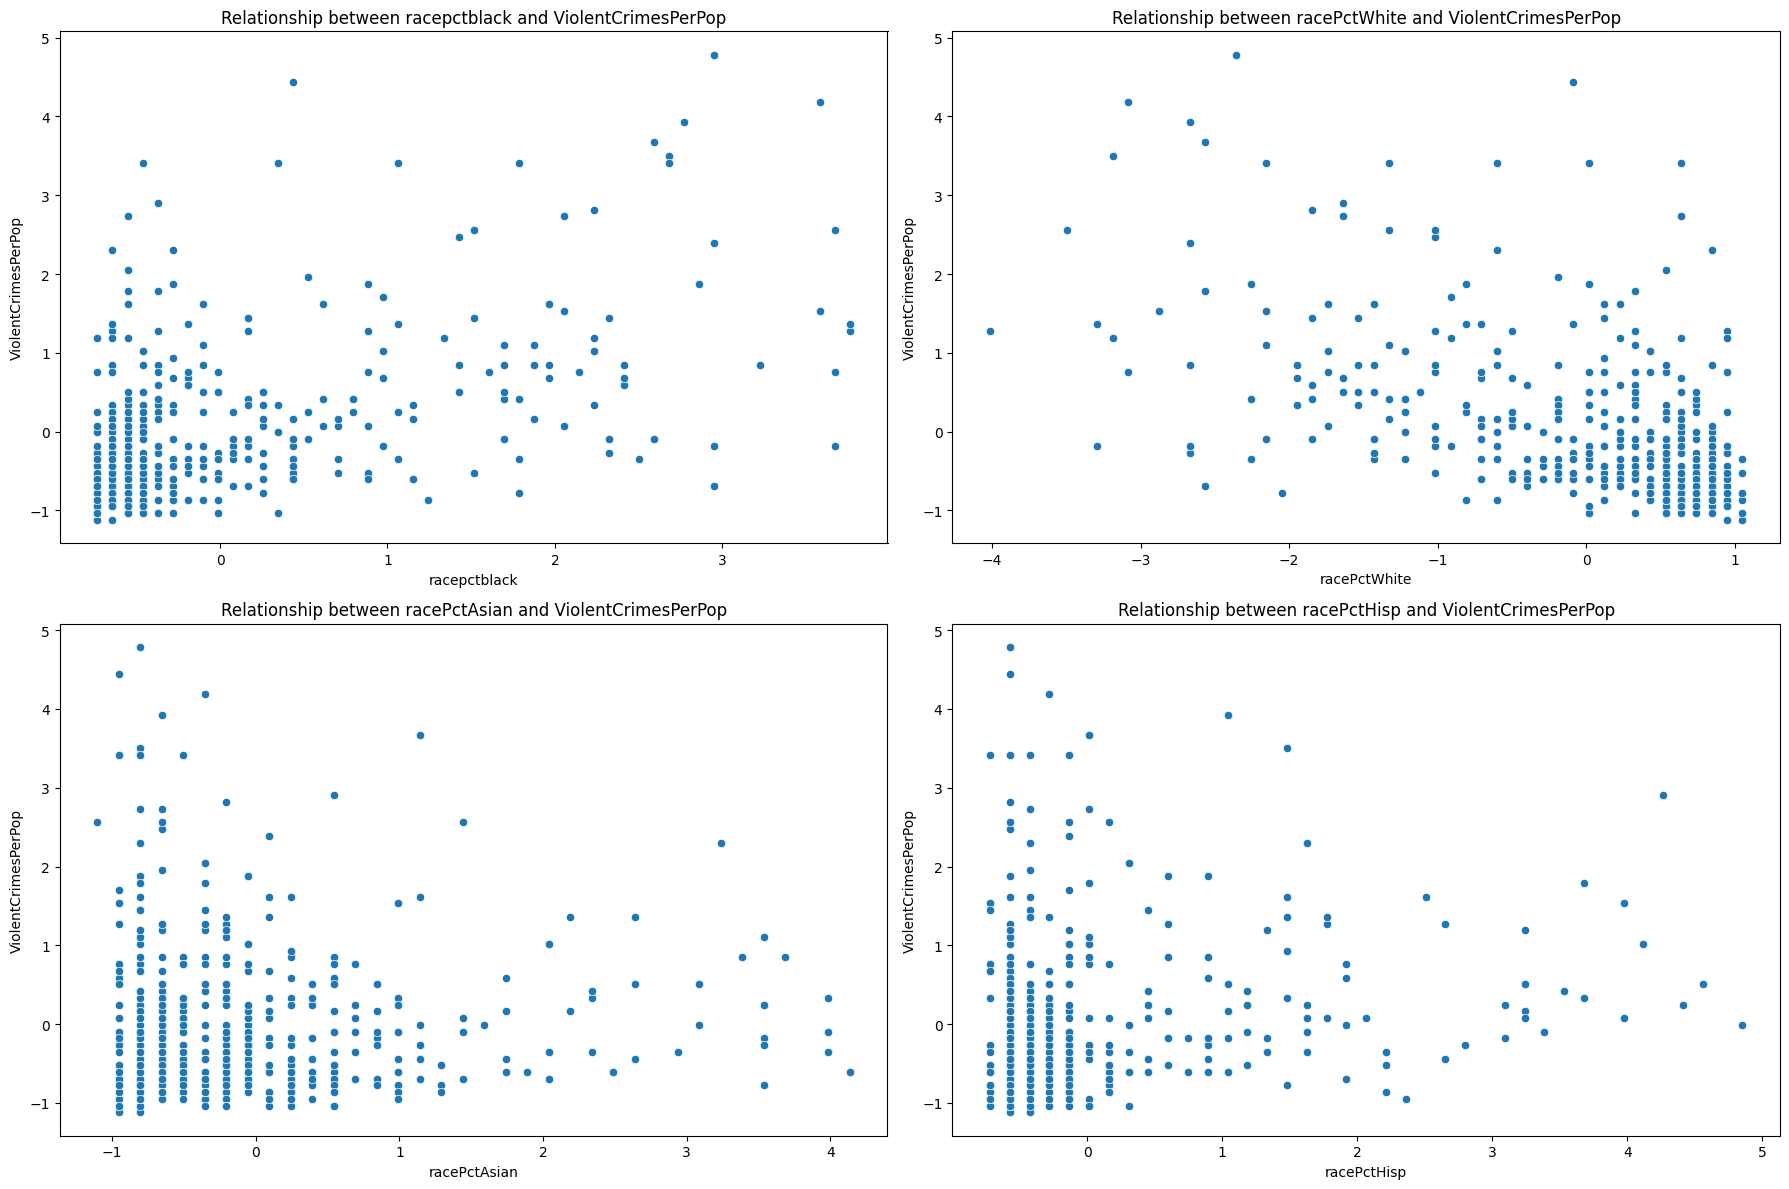

In [8]:
# 4. Feature Relationships with Sensitive Features
sensitive_features = ['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp']
plt.figure(figsize=(18, 12))
for i, feature in enumerate(sensitive_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[feature], y=data[target])
    plt.title(f'Relationship between {feature} and {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
plt.tight_layout()
plt.show()

In [9]:
# Building and Evaluating Predictive Models

# 1. Model Selection: Linear Regression and Random Forest
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [10]:
# 2. Split the dataset into training and testing sets
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 3. Train the models
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model
    print(f'{model_name} model trained.')

Linear Regression model trained.
Random Forest model trained.


In [12]:
# 4. Evaluate the models
for model_name, model in trained_models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f'\n{model_name} Model Evaluation:')
    print(f'Training RMSE: {mean_squared_error(y_train, y_pred_train, squared=False)}')
    print(f'Testing RMSE: {mean_squared_error(y_test, y_pred_test, squared=False)}')
    print(f'Training MAE: {mean_absolute_error(y_train, y_pred_train)}')
    print(f'Testing MAE: {mean_absolute_error(y_test, y_pred_test)}')
    print(f'Training R^2: {r2_score(y_train, y_pred_train)}')
    print(f'Testing R^2: {r2_score(y_test, y_pred_test)}')


Linear Regression Model Evaluation:
Training RMSE: 0.6699564711927812
Testing RMSE: 0.9292943823689844
Training MAE: 0.4951976466437991
Testing MAE: 0.6270491822826886
Training R^2: 0.5613331157665811
Testing R^2: 0.010942961442030219

Random Forest Model Evaluation:
Training RMSE: 0.31818760679044406
Testing RMSE: 0.8457309858287455
Training MAE: 0.22198732642901106
Testing MAE: 0.5852313869433543
Training R^2: 0.9010517318178832
Testing R^2: 0.18082026647767568


C:\Users\Fujitsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Fujitsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Fujitsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the ro

Linear Regression Model Evaluation
The linear regression model's performance is evaluated:

Training RMSE: 0.6699
Testing RMSE: 0.9293
Training R^2: 0.5613
Testing R^2: 0.0109
Takeaway: The linear regression model shows poor generalization, with a significant drop in R^2 from training to testing, indicating potential overfitting.

Random Forest Model Evaluation
The random forest model's performance is evaluated:

Training RMSE: 0.3182
Testing RMSE: 0.8457
Training R^2: 0.9011
Testing R^2: 0.1808
Takeaway: The random forest model performs better than linear regression, with improved R^2 and lower RMSE, though it still shows room for improvement in generalization.


Top 10 important features according to Random Forest:
racePctWhite           0.161952
PctIlleg               0.106305
racepctblack           0.082461
PctKids2Par            0.032034
blackPerCap            0.022230
PctEmplManu            0.019295
PctWorkMomYoungKids    0.017558
PctLess9thGrade        0.017383
PctWOFullPlumb         0.017307
PctHousNoPhone         0.015861
dtype: float64


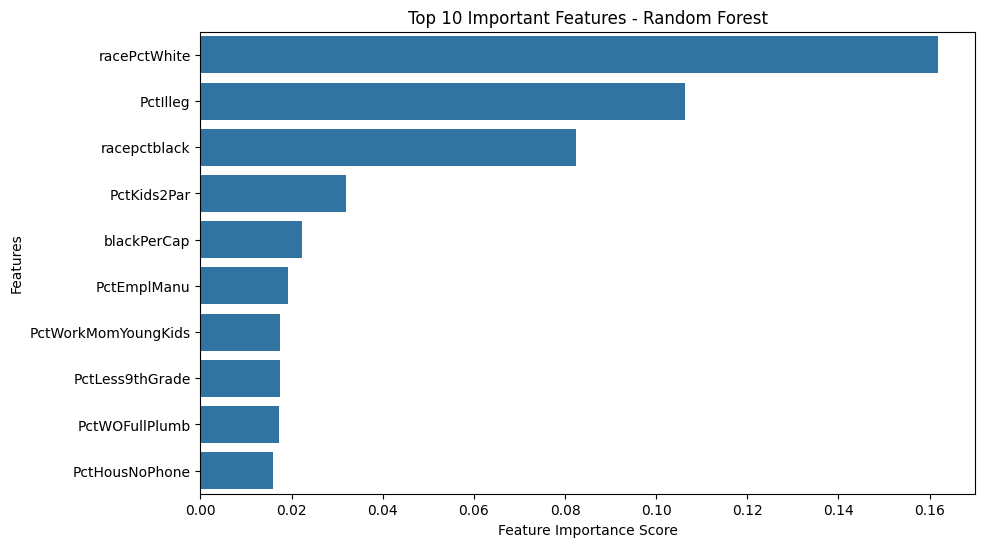

In [13]:
# 5. Feature Importance Analysis (for Random Forest)
rf_model = trained_models['Random Forest']
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 important features according to Random Forest:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

Top 10 Important Features - Random Forest
The bar plot visualizes the feature importance scores from the random forest model:

Top Features: racePctWhite, PctIlleg, racepctblack, PctKids2Par, and others are identified as the most important features.
Takeaway: These important features should be prioritized in further modeling and analysis, focusing on their relationships with the target variable.

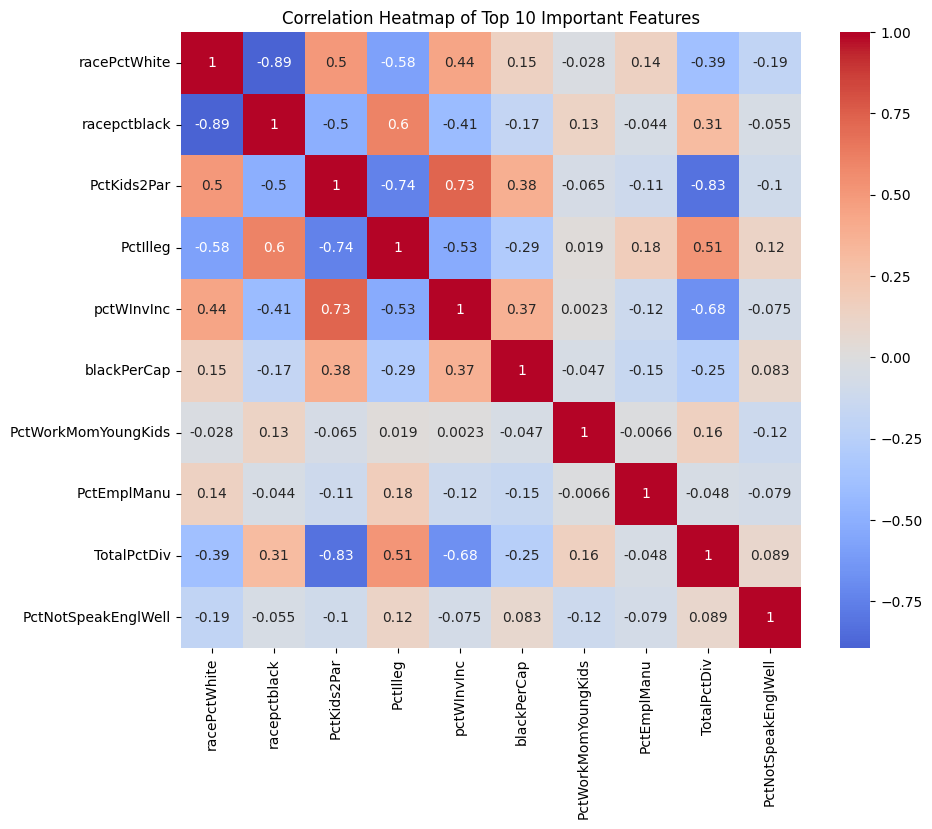

In [14]:
# Define the target variable
target = 'ViolentCrimesPerPop'

# Random Forest Model to determine feature importance
X = data.drop(columns=[target])
y = data[target]

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = feature_importance.head(10).index

# 1. Correlation Heatmap for Top Features
plt.figure(figsize=(10, 8))
sns.heatmap(data[top_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top 10 Important Features')
plt.show()

Correlation Heatmap of Top 10 Important Features
The heatmap reveals the correlations among the top 10 important features:

High Correlations: Some features show high correlations with each other, such as PctIlleg and NumIlleg.
Potential Redundancies: High correlations suggest potential redundancies, indicating the need for dimensionality reduction or feature selection.
Takeaway: These correlations help in refining the model, ensuring it captures unique and relevant information without redundancy.

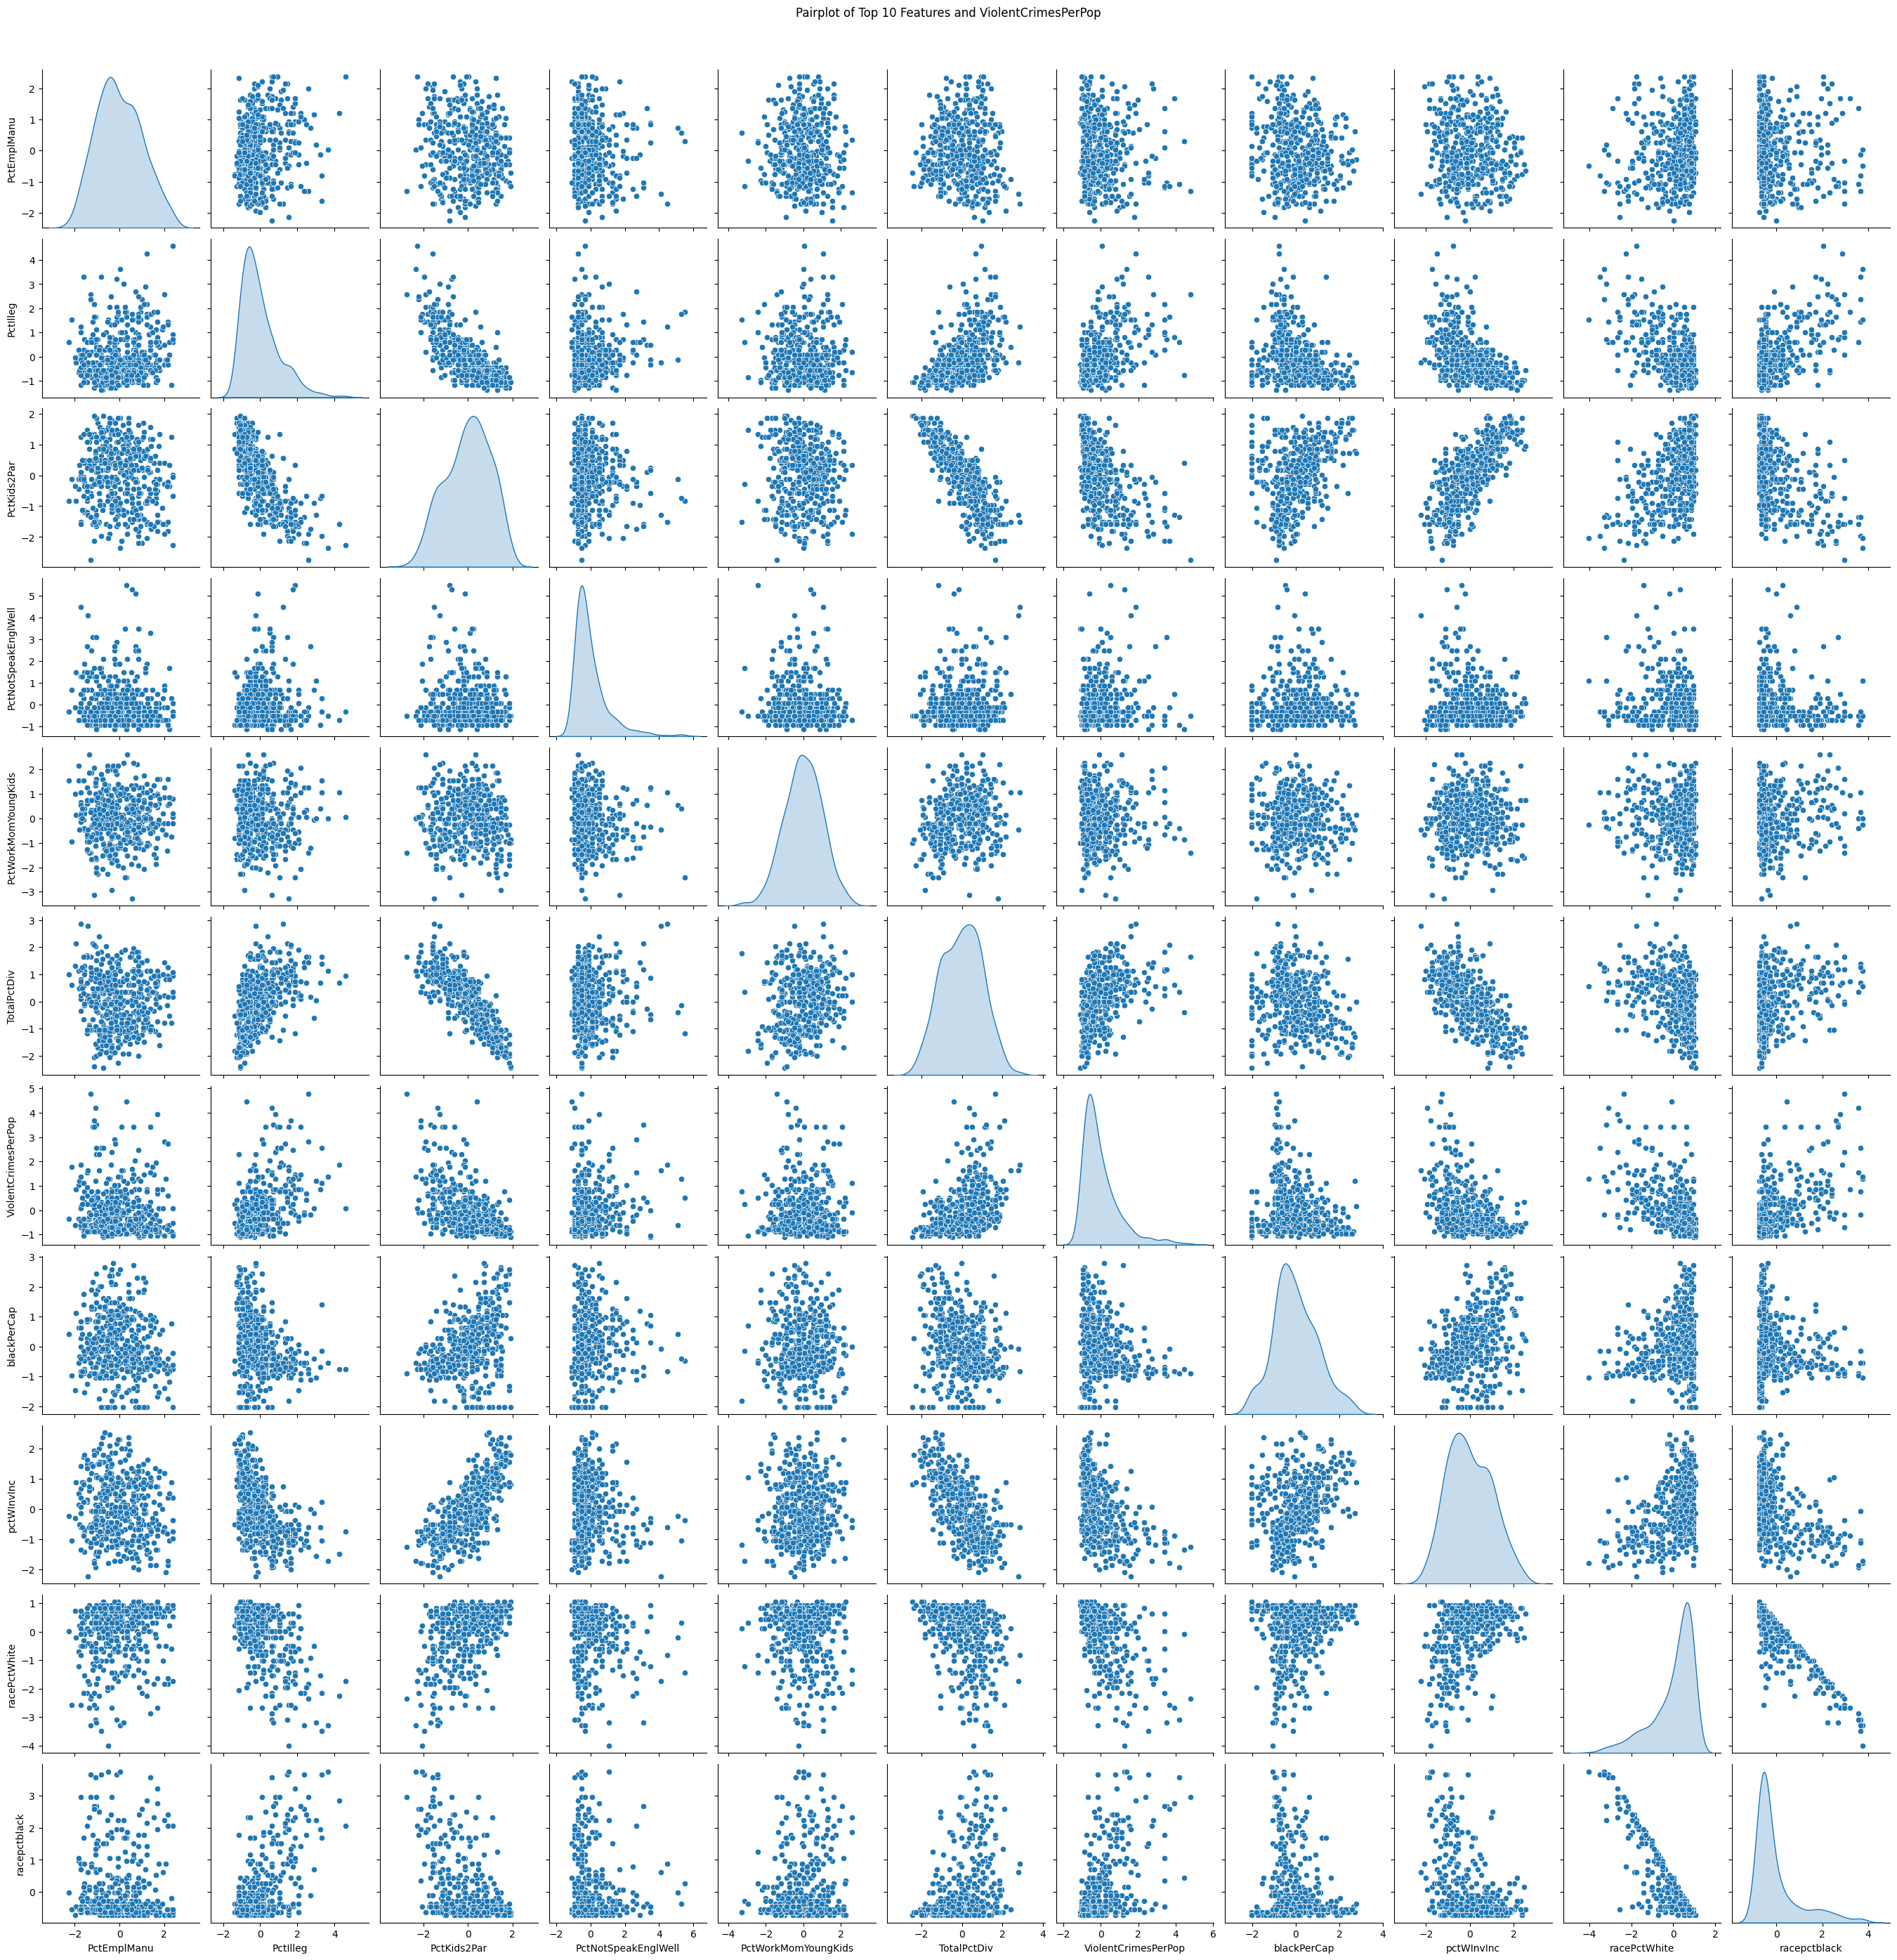

In [15]:
# 2. Pairplot for Top Features
sns.pairplot(data[top_features.union([target])], diag_kind='kde', kind='scatter')
plt.suptitle('Pairplot of Top 10 Features and ViolentCrimesPerPop', y=1.02)
plt.show()

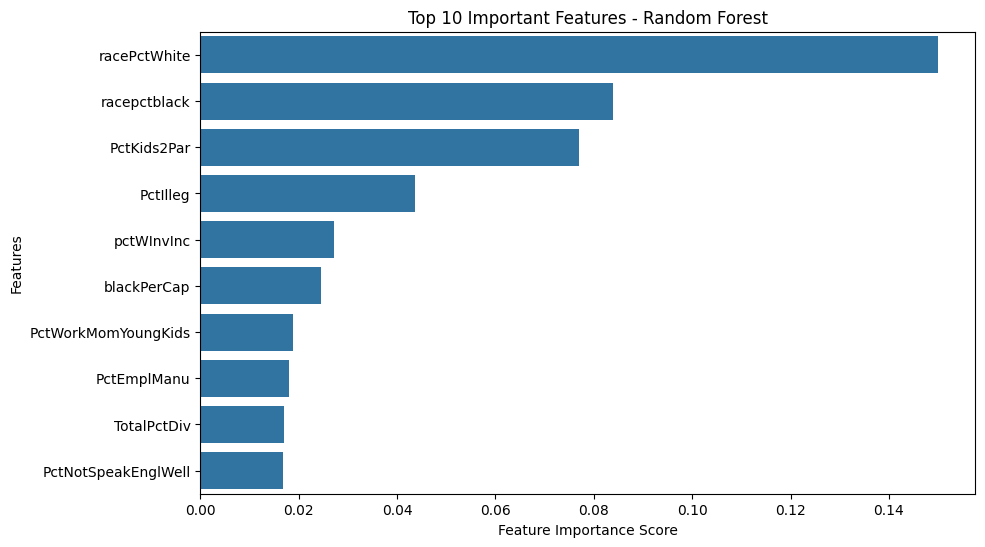

In [16]:
# 3. Bar Plot of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

This shows a slight shift between the Top 10 Features but the overall important features stayed the same

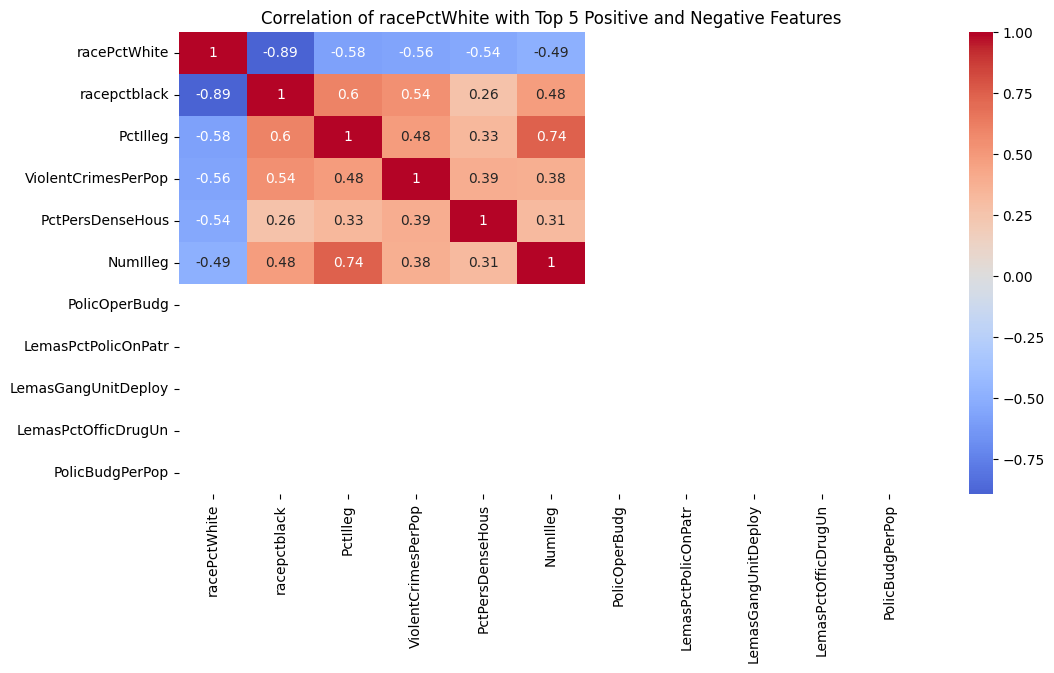

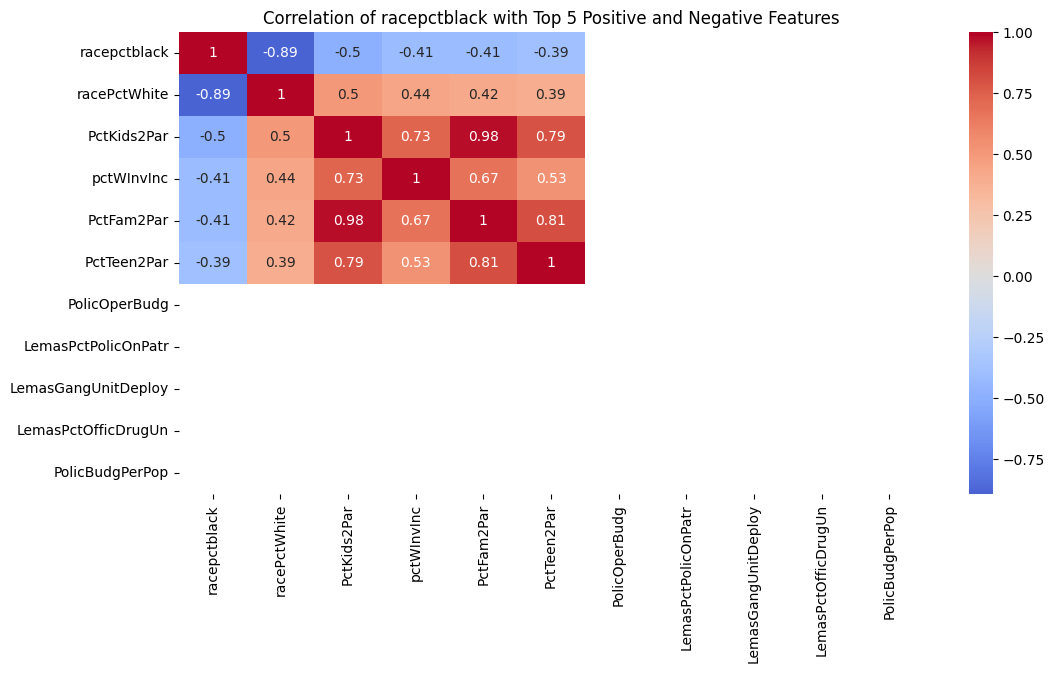

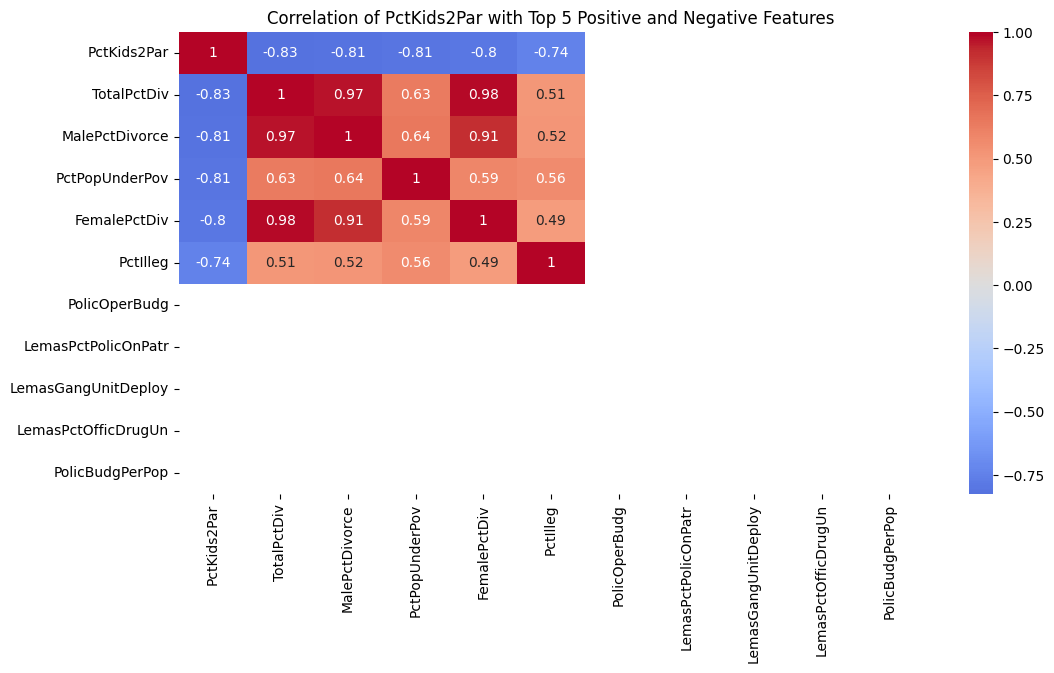

In [17]:
# 4. Detailed Correlation Analysis for Top 3 Features
top_3_features = feature_importance.head(3).index

for feature in top_3_features:
    corr_feature = data.corr()[feature].sort_values()
    top_5_neg = corr_feature.head(5).index
    top_5_pos = corr_feature.tail(5).index
    top_10_corr_features = top_5_neg.append(top_5_pos)
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(data[[feature] + list(top_10_corr_features)].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation of {feature} with Top 5 Positive and Negative Features')
    plt.show()

Correlation of racePctWhite with Top 5 Positive and Negative Features
The heatmap shows the correlation of racePctWhite with other features:

Strong Negative Correlation: racePctWhite has a strong negative correlation with racepctblack and PctIlleg.
Positive Correlations: Some positive correlations are observed with socio-economic features like PctPersDenseHous.
Takeaway: These correlations highlight the complex interplay between demographic features and crime rates, informing bias detection and mitigation strategies.

The other 2 graphics also show similar socie-economic trends:
racepctblack: Strongly correlated with racePctWhite and socio-economic factors.
PctKids2Par: Correlated with TotalPctDiv, MalePctDivorce, and other family-related features.
Takeaway: These detailed analyses help identify indirect correlations, guiding feature engineering and bias mitigation efforts.

In [18]:
print("Done")

Done
